In [1]:
import os
import sys
import math
import requests
import json

In [2]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [26]:
resp = requests.get("https://ichef.bbci.co.uk/news/976/mcs/media/images/69247000/jpg/_69247083_einsteingettyafp.jpg")

In [27]:
with open('image.jpeg', 'wb') as wrf:
    wrf.write(resp.content)
    wrf.close()

<IPython.core.display.Javascript object>


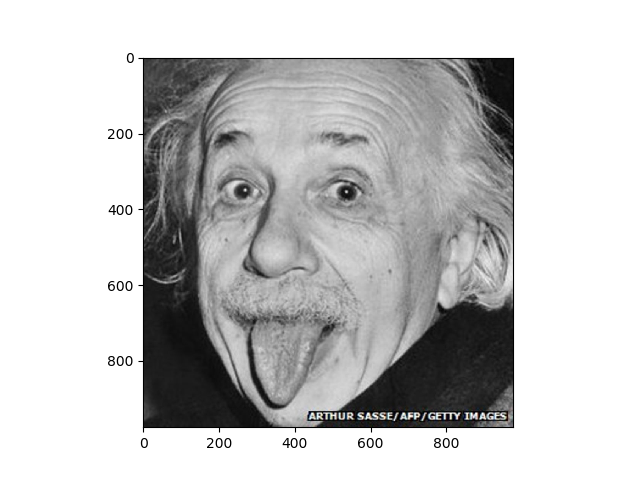

In [11]:
img = mpimg.imread("./image.jpeg")
implot = plt.imshow(img)
plt.show()

In [12]:
type(img)

numpy.ndarray

In [13]:
img.shape

(976, 976, 3)

In [14]:
## trying to convert the colored image to gray by taking ratio of R,G,B
## R -> 30%
## G -> 59%
## B -> 11%
## Gry = sum
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
gimg = R*0.3 + G*0.59 + B*0.11
gimg.shape

(976, 976)

<IPython.core.display.Javascript object>


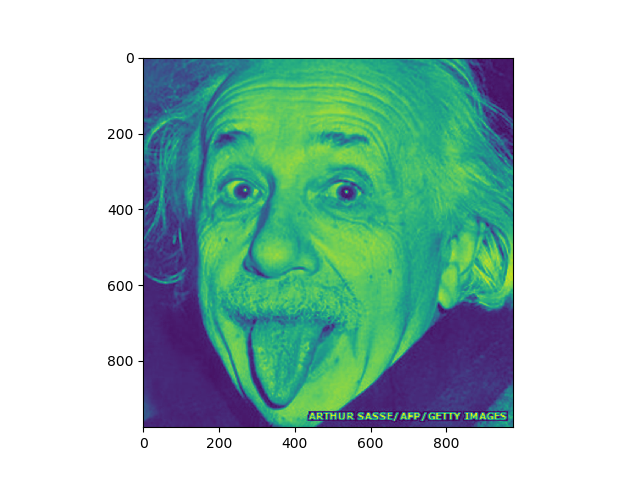

In [15]:
_ = plt.imshow(gimg)
plt.show()

In [16]:
trimg = np.rot90(gimg)

<IPython.core.display.Javascript object>


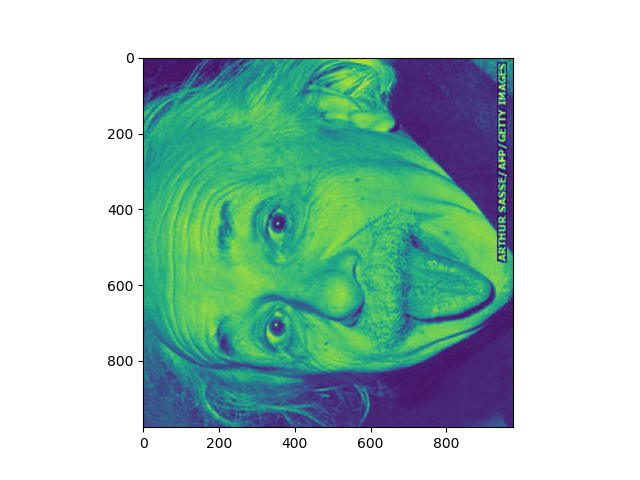

In [17]:
_ = plt.imshow(trimg)
plt.show()

In [18]:
new_rot = np.zeros(list(gimg.shape)+[2])

In [19]:
for i in range(0, gimg.shape[0]):
    for j in range(0, gimg.shape[1]):
        new_rot[i][j] = (i+1, j+1)

In [61]:
theta = int(input())
theta = (np.pi * theta)/180

180


In [62]:
skew_mat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
skew_mat.shape

(2, 2)

In [76]:
points = np.zeros((2,1))
new_point = np.zeros((1,2))
for i in range(new_rot.shape[0]):
    for j in range(new_rot.shape[1]):
        points[0][0] = new_rot[i][j][0]
        points[1][0] = new_rot[i][j][1]
        points = np.matmul(skew_mat, points)
        new_rot[i][j] = np.round(points.transpose())

In [77]:
new_rot

array([[[ 0.000e+00,  0.000e+00],
        [-1.000e+00,  0.000e+00],
        [-2.000e+00,  0.000e+00],
        ...,
        [-6.270e+02, -7.440e+02],
        [-6.270e+02, -7.440e+02],
        [-6.280e+02, -7.450e+02]],

       [[-1.000e+00, -1.000e+00],
        [-1.000e+00,  0.000e+00],
        [-2.000e+00,  0.000e+00],
        ...,
        [-6.280e+02, -7.430e+02],
        [-6.290e+02, -7.430e+02],
        [-6.290e+02, -7.450e+02]],

       [[-2.000e+00, -1.000e+00],
        [-2.000e+00,  0.000e+00],
        [-3.000e+00,  0.000e+00],
        ...,
        [-6.290e+02, -7.420e+02],
        [-6.290e+02, -7.420e+02],
        [-6.300e+02, -7.440e+02]],

       ...,

       [[-1.700e+02, -9.580e+02],
        [-1.710e+02, -9.580e+02],
        [-1.720e+02, -9.580e+02],
        ...,
        [-1.128e+03, -7.860e+02],
        [-1.128e+03, -7.860e+02],
        [-1.130e+03, -7.860e+02]],

       [[-1.710e+02, -9.590e+02],
        [-1.720e+02, -9.590e+02],
        [-1.730e+02, -9.580e+02],
        .

In [86]:
new_img = np.zeros(gimg.shape)
for i in range(gimg.shape[0]):
    for j in range(gimg.shape[1]):
        #print(new_rot[i][j][0], new_rot[i][j][1])
        (x, y) = abs((int(new_rot[i][j][0])), abs(int(new_rot[i][j][1])))
        if x >= 976 or y >= 976:
            new_img[i][j] = 0
            continue
        if new_img[i][j] == 0:
            new_img[i][j] = gimg[x, y]

TypeError: abs() takes exactly one argument (2 given)

In [ ]:
new_img.shape

<IPython.core.display.Javascript object>


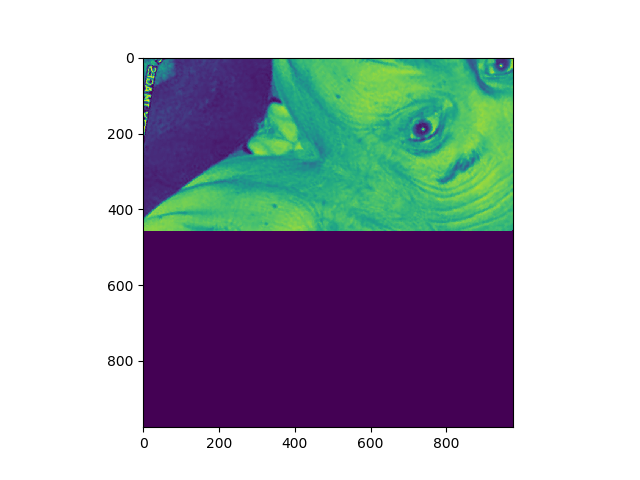

In [85]:
_ = plt.imshow(new_img)
plt.show()